# Exploring Willy Wonka

### Introduction

### Reading prompt

* consumer trends and make recs to executives

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('solutions_simulation_willy_wonka.csv')

In [3]:
df.columns

Index(['ORDER_ID', 'LIST_LINEITEM_ID', 'USER_ID', 'ORDER_DATE', 'ORDER_VALUE',
       'ORDER_ITEM_COUNT', 'ORDER_SINGLE_ITEM', 'ORDER_CHANNEL',
       'ORDER_COUPON_CODE', 'ORDER_REFERRER', 'ORDER_AD_SHOWN',
       'ORDER_STORE_CITY', 'ORDER_STORE_ID', 'ORDER_DAY_PART',
       'ORDER_IS_FREESHIPPING', 'LIST_SKU', 'LIST_SKU_CATEGORY',
       'LIST_SKU_FLAVOR', 'USER_LOYALTY_PROGRAM', 'USER_AGE', 'USER_GENDER'],
      dtype='object')

In [4]:
cols = df.columns

In [5]:
lower_cols = [col.lower() for col in cols]

In [6]:
df.columns = lower_cols

In [7]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://@localhost:5432/willy_wonka')

In [8]:
df = df.assign(order_date = pd.to_datetime(df['order_date']))

In [9]:
import pandas as pd

df.to_sql('raw_orders', engine, if_exists = 'replace')

625

In [ ]:
cols = ['order_store_id', 'user_id', 'order_referrer', 
        'order_channel', 'order_coupon_code', 'order_ad_shown', 'order_store_city', 'order_day_part', 'order_ad_shown']

In [154]:
grouped_bys = []
for col in cols:
    grouped = df.groupby([col]).sum().sort_values('order_value', ascending = False)['order_value']
    grouped_bys.append(grouped)

In [167]:
# 3577182.7424575733 * .8 =  2861746.193966059 -> 49487 users

3577182.7424575733 * .6

2146309.645474544

In [11]:
grouped_users = df.groupby(['user_id']).sum().sort_values('order_value', ascending = False)['order_value']

In [12]:
grouped_users

user_id
USER-17260602    514.347809
USER-17215538    486.461975
USER-17070511    430.708133
USER-17161237    396.048427
USER-17245375    385.248009
                    ...    
USER-17284633      0.034172
USER-17203286      0.031922
USER-17209266      0.030244
USER-17142100      0.018871
USER-17093839      0.003188
Name: order_value, Length: 102850, dtype: float64

In [15]:
percentile_users = grouped_users.cumsum()/grouped_users.sum()

* Core users

In [17]:
core_users = percentile_users[percentile_users < .90][percentile_users > .3]

# core_users

* Power users

In [18]:
power_users = percentile_users[percentile_users < .30]

In [28]:
df.index = df.user_id

In [32]:
power_user_orders = df.loc[power_users.index]

In [34]:
cols = ['order_store_id', 'order_referrer', 
        'order_channel', 'order_coupon_code', 'order_ad_shown', 'order_store_city', 'order_day_part', 'order_ad_shown']

In [35]:
grouped_bys = []
for col in cols:
    grouped = df.groupby([col]).sum().sort_values('order_value', ascending = False)['order_value']
    grouped_bys.append(grouped)

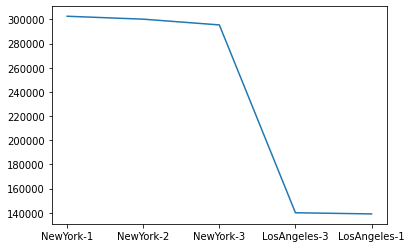

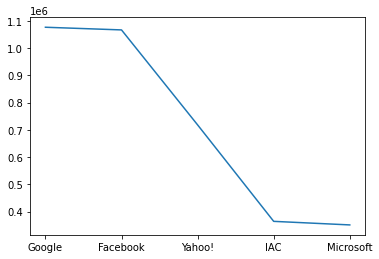

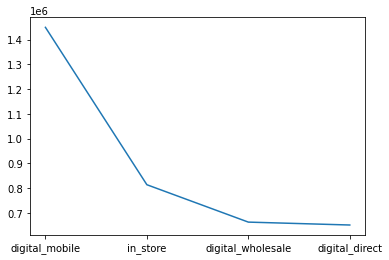

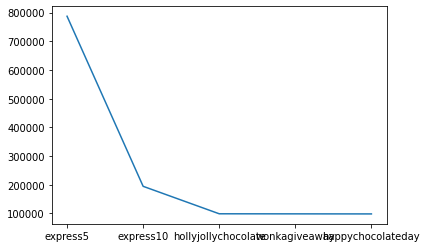

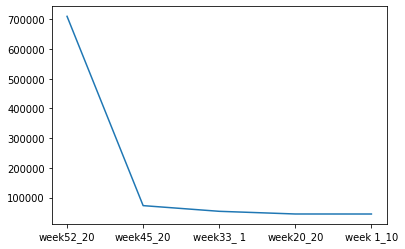

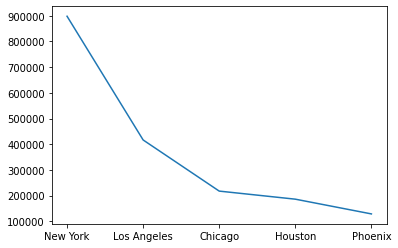

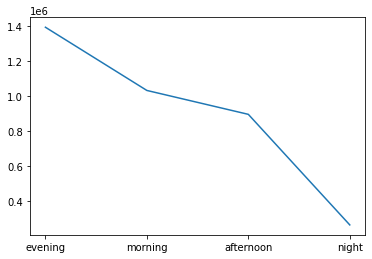

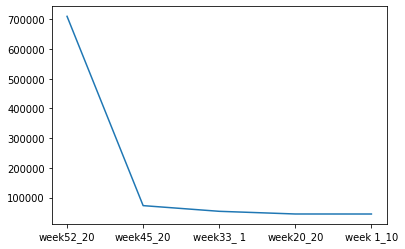

In [37]:
import matplotlib.pyplot as plt
for group in grouped_bys:
    plt.plot(group[:5])
    plt.show()